In [1]:
fn1 = "junlang"
ln1 = "zhan"
filename = "_".join(map(lambda s: s.strip().lower(),
["SD204_lab1", ln1, fn1])) + ".ipynb"
print filename

sd204_lab1_zhan_junlang.ipynb


## Exercise 1

In [1]:
import sys
import urllib
from os import path
import zipfile
import pandas as pd

In [3]:
url = u'https://archive.ics.uci.edu/ml/machine-learning-databases/00235/'
filename = 'household_power_consumption'
zipfilename = filename + '.zip'
Location = url + zipfilename
# testing existence of file:
if sys.version_info >= (3, 0):
    if not(path.isfile('zipfilename')):
        urllib.request.urlretrieve(Location, zipfilename)
else:
    if not(path.isfile('zipfilename')):
        urllib.urlretrieve(Location, zipfilename)
# unzip part
zip = zipfile.ZipFile(zipfilename)
zip.extractall()
# Detect and count lines with missing values.
na_values = ['?', '']
fields = ['Date', 'Time', 'Global_active_power', 'Sub_metering_1']
df0 = pd.read_csv(filename + '.txt', sep=';', nrows=200000,
na_values=na_values, usecols=fields)

In [4]:
df=df0.dropna(axis=0,how='any')
print df0.shape[0]-df.shape[0]

3732


1) The number of missing values is 3732

2)

In [5]:
df.loc[:,'Sub_metering_1']=df['Sub_metering_1']*60./1000.

D:\Anaconda3.6\envs\Python2.7\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


3)

In [6]:
newIndex=pd.to_datetime(df['Date']+df['Time'],format='%d/%m/%Y%H:%M:%S')
df=df.set_index(newIndex)

4) truncate和loc的不同

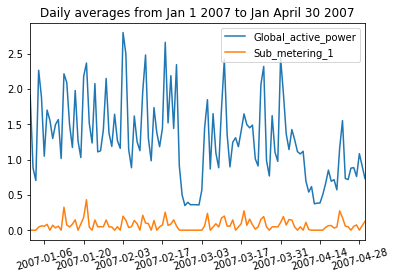

In [9]:
import matplotlib.pyplot as plt 
tmp=df.loc['2007-1-1':'2007-4-30',:]
d_avg=tmp.groupby(tmp.index.date).mean()
d_avg.plot(rot=15, title='Daily averages from Jan 1 2007 to Jan April 30 2007')
plt.show()

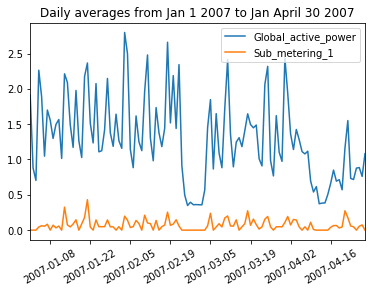

In [15]:

df1=df.truncate('2007-1-1','2007-4-30')
d_avg=df1.groupby(df1.index.date).mean()
d_avg.plot(rot=30, title='Daily averages from Jan 1 2007 to Jan April 30 2007')
plt.show()

The valley appears maybe because of the holiday. People go travelling. 

5)

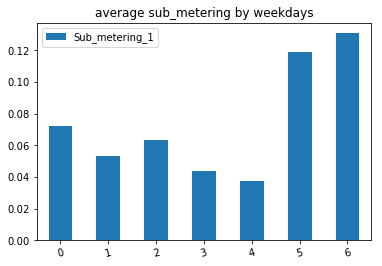

In [16]:
weekday_avg=df.groupby(df.index.weekday).mean()
del weekday_avg['Global_active_power']
weekday_avg.plot(rot=15,title='average sub_metering by weekdays',kind='bar')
plt.show()

6)

In [20]:
url = u'http://josephsalmon.eu/enseignement/TELECOM/MDI720/datasets/TG_STAID011249.txt'
fields = [ '    DATE', '   TG']
df2 = pd.read_csv('TG_STAID011249.txt',  usecols=fields,comment='#')

In [120]:
df2=df2.dropna(how='any')

In [121]:
df2['   TG']=df2['   TG']/(10.0)

7)

In [122]:
new_index2=pd.to_datetime(df2['    DATE'], format='%Y%m%d')
df2.set_index(new_index2,inplace=True)
df2.head()

,DATE,TG
DATE,,
1921-03-01,19210301,5.0
1921-03-02,19210302,4.6
1921-03-03,19210303,4.6
1921-03-04,19210304,3.1
1921-03-05,19210305,9.5


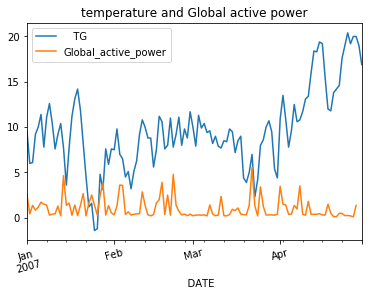

In [123]:
del df2['    DATE']
df2=df2.truncate('2007-01-01','2007-04-30')
df2['Global_active_power']=df1['Global_active_power']
df2.plot(rot = 15, title = "temperature and Global active power")
plt.show()

## Exercise 2

8)

In [2]:
url = u'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original'
fields = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
          'acceleration', 'year', 'country', 'car name']
cars = pd.read_csv(url,header=None,sep='\s+', names=fields)
#cars=cars.dropna(how='any') 

In [3]:
cars.shape

(406, 9)

In [4]:
cars=cars.dropna(how='any') 

In [5]:
cars.shape

(392, 9)

In [6]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,country,car name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


The markers for the missing values is 'NA'

9)

In [7]:
cars['country']=cars['country'].replace(1,'USA')
cars['country']=cars['country'].replace(2,'Europe')
cars['country']=cars['country'].replace(2,'Japan')

In [8]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,country,car name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,USA,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,USA,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,USA,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,USA,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,USA,ford torino


10)

In [10]:
from sklearn import linear_model
from sklearn import preprocessing
import statsmodels.api as sm


In [11]:

tmp=cars.head(9)
y = tmp['mpg']
X = tmp[['cylinders','displacement','horsepower','weight','acceleration','year']]
# Fit regression model (with statsmodels)
X = sm.add_constant(X)
sm_linmod = sm.OLS(y, X).fit()


In [12]:
sm_linmod.params #the parameters of the linear model

cylinders       0.049592
displacement    0.054088
horsepower     -0.094531
weight         -0.004241
acceleration   -0.199367
year            0.433928
dtype: float64

We can see that model year is an impoertant factor.

11)

In [13]:
y = cars['mpg']
X=cars[['cylinders','displacement','horsepower','weight','acceleration','year']]
X_scaled=preprocessing.scale(X)   #centering and scaling
sm_linmod = sm.OLS(y, X).fit()

In [14]:
sm_linmod.params #the parameters of the linear model

cylinders      -0.522609
displacement    0.010221
horsepower     -0.020873
weight         -0.006395
acceleration   -0.052022
year            0.610259
dtype: float64

We can see that cylinders and years are important factors. Cylinder has negative correlation with gasoline consumption, while model year has positive correlation with gasoline consumption.

12)

In [15]:
y_predict=sm_linmod.predict(X)

In [16]:
mean1=y.mean()
mean2=y_predict.mean()
a=0
b=0
for i in range(406):
    try:
        a=a+(y[i]-mean1)**2
        b=b+(y_predict[i]-mean2)**2
    except:
        pass
r=a-b

In [17]:
print("The norm square of residual vector is %f" % r)

The norm square of residual vector is 5007.768130


13)

In [18]:
X_mean=X.mean()
X_std=X.std()

In [19]:
X_mean

cylinders          5.471939
displacement     194.411990
horsepower       104.469388
weight          2977.584184
acceleration      15.541327
year              75.979592
dtype: float64

In [20]:
predict=[6,225,100,3233,15.4,2017]
for i in range(6):
    predict[i]=(predict[i]-X_mean[i])/X_std[i]

In [21]:
result=sm_linmod.predict(predict)

In [22]:
print("the predition result is %f" % result[0]) 

the predition result is 321.399551


In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np

P=Pipeline([("scaler",StandardScaler()),("lr",LinearRegression(fit_intercept=False))])

y = cars['mpg']
X=cars[['cylinders','displacement','horsepower','weight','acceleration','year']]

P.fit(X,y)
x=np.array([[6,225,100,3233,15.4,2017]])
print P.score(X,y)

-8.23758990228
